***
## Données de population

<u>Sources</u>
- 2021 : Statistique Canada, Estimations de la population (septembre 2022). Adapté par l'Institut de la statistique du Québec.
- 2026 à 2066 : Institut de la statistique du Québec, Mise à jour 2022 des perspectives démographiques du Québec et des régions, 2021-2066.
***

In [2]:
# Importation du module qui détermine les paths
import path

path_data = path.path_data
path_df = path.path_df
path_output = path.path_output

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant

c:\Users\Charles_tour\Documents\GitHub\car_stock_forecast\
c:\Users\Charles_tour\Documents\GitHub\car_stock_forecast\Data\
c:\Users\Charles_tour\Documents\GitHub\car_stock_forecast\Dataframe\
c:\Users\Charles_tour\Documents\GitHub\car_stock_forecast\Output\


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Import des données de population
pop_hisorique_data = pd.read_excel(path_data + 'population_0.xlsx')
pop_forecast_data = pd.read_excel(path_data + 'population_1.xlsx')

# Sources
# 2021 : Statistique Canada, Estimations de la population (septembre 2022). Adapté par l'Institut de la statistique du Québec.
# 2026 à 2066 : Institut de la statistique du Québec, Mise à jour 2022 des perspectives démographiques du Québec et des régions, 2021-2066.


In [5]:
# Données historiques
pop_hisorique_data = pd.read_excel(path_data + 'population_0.xlsx', header=3)
pop_hisorique_data = pop_hisorique_data.loc[pop_hisorique_data['Année'] >= 2000].reset_index(drop=True)
print(pop_hisorique_data.dtypes)
pop_hisorique_data

Année         int64
Population    int64
dtype: object


,Année,Population
0,2000,7356951
1,2001,7396456
2,2002,7441656
3,2003,7485753
4,2004,7535590
5,2005,7581476
6,2006,7631966
7,2007,7692916
8,2008,7761725
9,2009,7843383


In [6]:
# Prévisions
pop_forecast_data = pd.read_excel(path_data + 'population_1.xlsx', header=4)
# On veut l'indice de la population total pour faire une prédiction en niveau avec les données historiques

pop_forecast_data = pop_forecast_data[['Année', '(base 100 = 2021)']].rename(columns={'(base 100 = 2021)':'Indice'})
pop_forecast_data = pop_forecast_data[(pop_forecast_data.index > 0) & (pop_forecast_data.index <= 10)].astype({'Année':int, 'Indice':float})
print(pop_forecast_data.dtypes)
pop_forecast_data.head(3)

Année       int32
Indice    float64
dtype: object


,Année,Indice
1,2021,100.0
2,2026,104.1
3,2031,106.6


In [7]:
# Interpolation
all_years = pd.DataFrame(range(2021,2066), columns=['Année'])
all_years_forecast = all_years.merge(pop_forecast_data, how='left').interpolate()

# Ajouter les années historiques
all_years = pd.DataFrame(range(2000,2066), columns=['Année'])
all_years_forecast = all_years.merge(all_years_forecast, how='left')

all_years_forecast

,Année,Indice
0,2000,NaN
1,2001,NaN
2,2002,NaN
3,2003,NaN
4,2004,NaN
...,...,...
61,2061,115.6
62,2062,115.6
63,2063,115.6
64,2064,115.6


In [8]:
# Ajouter à la population en absolu
pop_total = pop_hisorique_data.merge(all_years_forecast, how='right')
pop_total

,Année,Population,Indice
0,2000,7356951.0,NaN
1,2001,7396456.0,NaN
2,2002,7441656.0,NaN
3,2003,7485753.0,NaN
4,2004,7535590.0,NaN
...,...,...,...
61,2061,NaN,115.6
62,2062,NaN,115.6
63,2063,NaN,115.6
64,2064,NaN,115.6


In [9]:
pop_forecast = pop_total.copy()
value2021 = pop_forecast['Population'].loc[pop_forecast['Année']==2021]
pop_forecast['Pop_forecast'] = pop_forecast['Indice'].apply(lambda x : x*value2021/100)
pop_forecast['Pop_forecast'] = np.where(pop_forecast['Pop_forecast'].isna(), pop_forecast['Population'], pop_forecast['Pop_forecast'])
pop_forecast = pop_forecast[['Année', 'Pop_forecast']]
pop_forecast

,Année,Pop_forecast
0,2000,7356951.00
1,2001,7396456.00
2,2002,7441656.00
3,2003,7485753.00
4,2004,7535590.00
...,...,...
61,2061,9944299.26
62,2062,9944299.26
63,2063,9944299.26
64,2064,9944299.26


In [10]:
# save dataframe
pop_forecast.to_hdf(path_df + 'pop_forecast.h5', key='s')

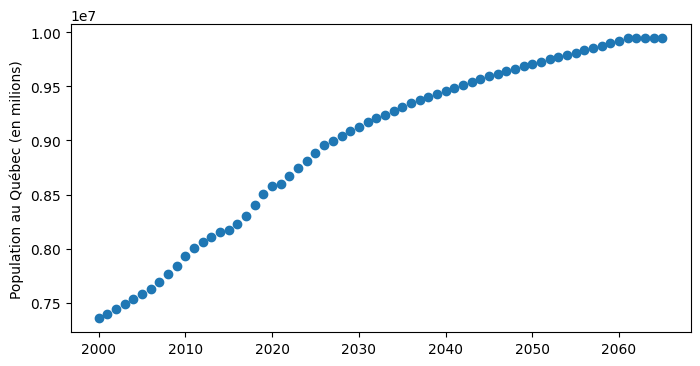

In [11]:
plt.figure(figsize=(8,4))
plt.scatter(pop_forecast['Année'], pop_forecast['Pop_forecast'])
plt.ylabel('Population au Québec (en milions)')
plt.show()